In [85]:
from lib import save_animation, integrate_rk, integrate_rk_delta, domain, get_derivative_matrix, initial_gauss
import numpy as np


In [86]:
n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y[:, 0] = initial_gauss(x, l, premik=-25)
y1 = np.zeros((len(x), 2))


In [87]:
zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=150, n_steps=3000,mu=1)
#save_animation(x, zg_resitev, sp_resitev, t, 'test_velocity.gif', idx=1)


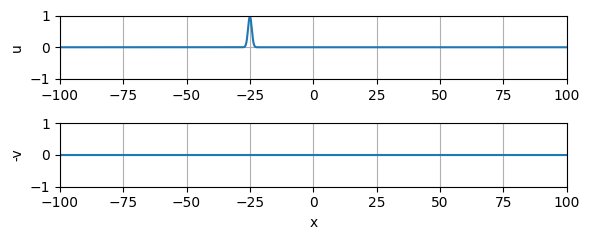

In [91]:
import matplotlib.pyplot as plt
def plot_static_img(x, zg, sp, t_idx):
    fig, ax = plt.subplots(2, figsize=(9, 6))
    ax[0].set_xlim(-100, 100)
    ax[0].set_ylim(-1, 1)
    ax[1].set_xlim(-100, 100)
    ax[1].set_ylim(-1, 1)
    ax[0].plot(x, zg[t_idx, :, 0])
    ax[1].plot(x, sp[t_idx, :, 0])
    ax[0].grid()
    ax[1].grid()
    ax[1].set_xlabel('x')
    ax[0].set_ylabel('u')
    ax[1].set_ylabel('-v')
    fig.tight_layout()
    return fig


fig = plot_static_img(x, zg_resitev, sp_resitev, 3)
# set figsize here


fig.set_size_inches(6, 2.5)
fig.tight_layout()
#fig.savefig('test_velocity.png', dpi=300)
fig.savefig("step0_gauss.pdf")

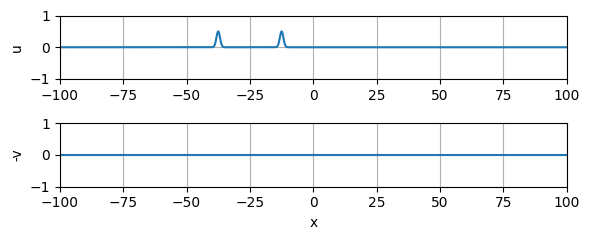

In [92]:
fig = plot_static_img(x, zg_resitev, sp_resitev, 250)
# set figsize here
fig.set_size_inches(6, 2.5)
fig.tight_layout()
#fig.savefig('test_velocity.png', dpi=300)
fig.savefig("step1_gauss.pdf")


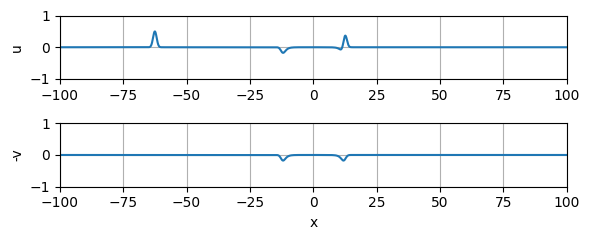

In [93]:
fig = plot_static_img(x, zg_resitev, sp_resitev, 750)
# set figsize here
fig.set_size_inches(6, 2.5)
fig.tight_layout()
#fig.savefig('test_velocity.png', dpi=300)
fig.savefig("step2_gauss.pdf")

Saving animation...


MovieWriter ffmpeg unavailable; using Pillow instead.


Done - animation saved to test_GAUSS.gif


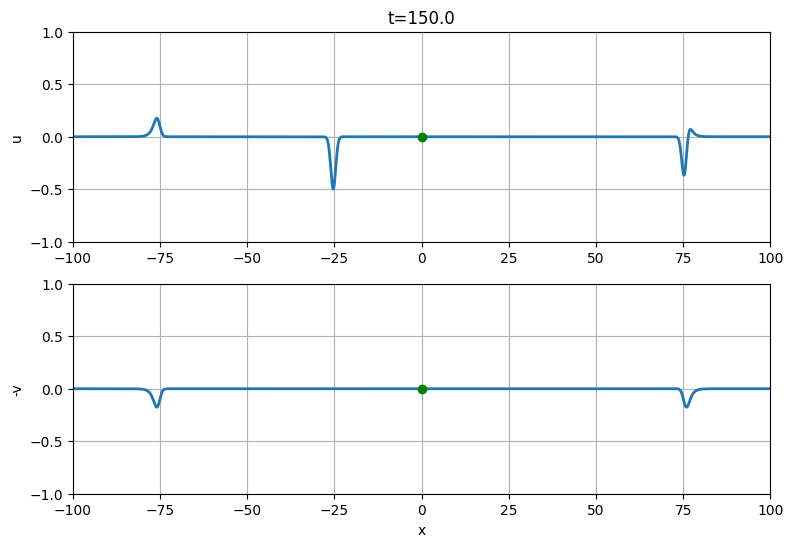

In [94]:
save_animation(x, zg_resitev, sp_resitev, t, 'test_GAUSS.gif')

In [3]:
Nspace_list = [500, 1000, 2000]
Ntime_list = [5000, 10000, 15000]
results = np.zeros((len(Nspace_list), len(Ntime_list)))

for i, Nspace in enumerate(Nspace_list):
    for j, Ntime in enumerate(Ntime_list):
        x, l, m, r = domain(Nspace, d=100)
fig.set_size_inches(6, 2.5)
        y = np.zeros((len(x), 2))
        y[:, 0] = initial_gauss(x, l, premik=-25)
        y1 = np.zeros((len(x), 2))
        zg_resitev, sp_resitev, t = integrate_rk(y, y1, domain(Nspace, d=100), get_derivative_matrix(2*Nspace+1), Qu=1, Qv=1, T=500, n_steps=Ntime)
        result = max([np.max(np.abs(zg_resitev)), np.max(np.abs(sp_resitev))])
        results[i, j] = result
        print(Nspace, Ntime, result)


500 5000 1.0
500 10000 1.0
500 15000 1.0
1000 5000 1.678420411334455e+48
1000 10000 11011579884.783733
1000 15000 1.0


/mnt/c/Users/Gregor/git/coupled_strings_mafija2/notebooks/lib.py:143: RuntimeWarning: overflow encountered in divide
  dydt_all = A @ y[:, 0] / (h**2)
/mnt/c/Users/Gregor/git/coupled_strings_mafija2/notebooks/lib.py:101: RuntimeWarning: invalid value encountered in subtract
  e[i+1] = abs( x5 - x[i+1] )
/mnt/c/Users/Gregor/git/coupled_strings_mafija2/notebooks/lib.py:88: RuntimeWarning: invalid value encountered in add
  k3 = h * f( x[i] + c31 * k1 + c32 * k2, t[i] + c30 * h )
/mnt/c/Users/Gregor/git/coupled_strings_mafija2/notebooks/lib.py:89: RuntimeWarning: invalid value encountered in add
  k4 = h * f( x[i] + c41 * k1 + c42 * k2 + c43 * k3, t[i] + c40 * h )
/mnt/c/Users/Gregor/git/coupled_strings_mafija2/notebooks/lib.py:90: RuntimeWarning: invalid value encountered in add
  k5 = h * f( x[i] + c51 * k1 + c52 * k2 + c53 * k3 + c54 * k4, \
/mnt/c/Users/Gregor/git/coupled_strings_mafija2/notebooks/lib.py:93: RuntimeWarning: invalid value encountered in add
  x[i] + c61 * k1 + c62 * k2

2000 5000 nan
2000 10000 1.6649907308119345e+112
2000 15000 4.7738674607712725e+112


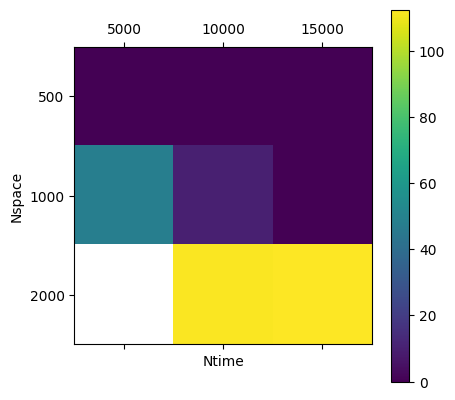

In [22]:
results

import matplotlib.pyplot as plt
plt.matshow(np.log10(results))
plt.colorbar()
plt.xticks(np.arange(len(Ntime_list)), Ntime_list)
plt.yticks(np.arange(len(Nspace_list)), Nspace_list)
plt.xlabel('Ntime')
plt.ylabel('Nspace')
plt.show()


In [11]:
def wave_initial_condition(domain, k):
    c = 1.
    x, l, m, r = domain
    y = np.zeros((len(x), 2))
    y[:, 0] = np.sin(k*x)
    y[:, 1] = -1*c/k*np.cos(k*x)
    return y


n_space_pts = 1000
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y = wave_initial_condition((x, l, m, r), 0.3)
left_close = l[:len(l)//2]
y[left_close, :]  = 0.
y[r] = 0.

#y[:, 1]  = 0.
y1 = np.zeros((len(x), 2))

zg_resitev, sp_resitev, t = integrate_rk(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1), Qu=1, Qv=1, T=150, n_steps=3000)
save_animation(x, zg_resitev, sp_resitev, t, 'test1.gif')


KeyboardInterrupt: 

In [6]:
y = wave_initial_condition((x, l, m, r), 0.3  )
plt.plot(x, y[:, 0])
plt.show()

NameError: name 'plt' is not defined

In [5]:
import matplotlib.pyplot as plt

plt.plot(x, zg_resitev[50, :, 0])
plt.show()

NameError: name 'zg_resitev' is not defined

In [42]:
n_space_pts = 500
x, l, m, r = domain(n_space_pts, d=100)
y = np.zeros((len(x), 2))
y1 = np.zeros((len(x), 2))
zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domain(n_space_pts, d=100), get_derivative_matrix(2*n_space_pts+1, order=7), q_mu_u=1, q_mu_v=1, T=300, n_steps=15000, left_condition=lambda t: np.sin(2*t), mu=1, c_squared_v=0.5)


1.0472593317475583
0.9427458326109589
0.9002028475963083
max 1.0469974384777225


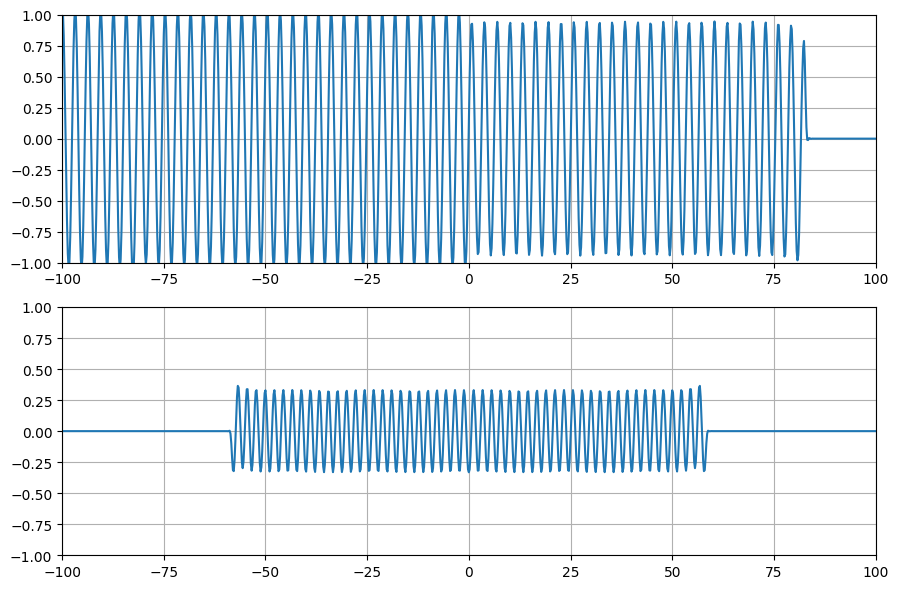

In [45]:

plot_time = 183  # 100 to get input amplitude, 200 to get outputs
fig = plot_static_img(x, zg_resitev, sp_resitev, int(plot_time/300*len(t)))

domena = domain(n_space_pts, d=100)
x, left_idx, middle_idx, right_idx = domena

input_amp = np.max(zg_resitev[int(100/300*len(t)), left_idx[5:], 0])
print(input_amp)
output_amp = np.max(zg_resitev[int(150/300*len(t)), right_idx[5:], 0])
print(output_amp)
print(output_amp/input_amp)

upper_left_idx = np.arange(len(x))[(x < 0) & (x > -25)]
print("max", np.max(zg_resitev[int(100/300*len(t)), upper_left_idx, 0]))

Saving animation...


MovieWriter ffmpeg unavailable; using Pillow instead.


Done - animation saved to test_vzbujanje_sibka_sklopitev_100k.gif


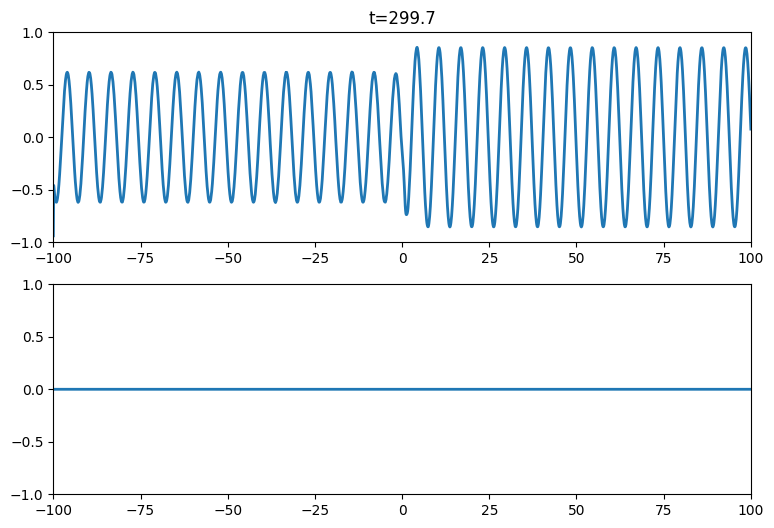

In [75]:
save_animation(x, zg_resitev, sp_resitev, t, 'test_vzbujanje_sibka_sklopitev_100k.gif')

array([0.        , 0.        , 0.00899988, ..., 0.90576734, 0.90191673,
       0.89799307])

In [48]:
from time import time

def estimate_sin_ampl(arr):
    return np.mean(np.sort(arr)[-10:])
def get_amplitudes(k, order=4, n_space_pts=2000, n_time_steps=15000):
    start_time = time()
    c = 1.
    omega = c*k
    domena = domain(n_space_pts, d=100)
    x, left_idx, middle_idx, right_idx = domena
    y = np.zeros((len(x), 2))
    y1 = np.zeros((len(x), 2))
    zg_resitev, sp_resitev, t = integrate_rk_delta(y, y1, domena, get_derivative_matrix(2*n_space_pts+1, order=order), q_mu_u=1, q_mu_v=1, T=201, n_steps=n_time_steps, left_condition=lambda t: np.sin(omega*t), mu=1.)
    #return x, zg_resitev[:, :, 0]
    idx_left_upper = np.arange(len(x))[(np.abs(x) < 25) & (x < 0)]
    #print(idx_left_upper)
    ampl_input = estimate_sin_ampl(np.abs(zg_resitev[int(100/200*len(t)), idx_left_upper, 0]))
    # only use data from -25 to +25 (there is a slight bump at the first wave due to a discontinuity in the initial condition)
    idx_lower = np.arange(len(x))[(np.abs(x) < 25)]  # & (np.abs(x) > 25)]
    idx_right_upper = np.arange(len(x))[(np.abs(x) < 50) & (x > 0)]
    #idx_lower = left_idx[10:]
    ampl_output = np.max(zg_resitev[int(180/200*len(t)), idx_right_upper, 0])
    ampl_lower_reflected = estimate_sin_ampl(np.abs(sp_resitev[int(180/200*len(t)), idx_lower, 0]))
    ampl_lower_trasmitted =estimate_sin_ampl(np.abs(sp_resitev[int(180/200*len(t)), idx_lower, 0]))
    #print(ampl_output/ampl_input, ampl_lower_reflected/ampl_input, ampl_lower_trasmitted/ampl_input)
    t = ampl_output/ampl_input
    t_tilde  = ampl_lower_trasmitted/ampl_input
    r_tilde = ampl_lower_reflected/ampl_input
    #return zg_resitev[int(100/300*len(t)), :, 0], idx_left_upper
    return t, t_tilde, r_tilde, time()-start_time


In [14]:
result = get_amplitudes(6.,  order=7, n_space_pts=500)

In [9]:
result

(0.983968588065142,
 0.06107840609446793,
 0.06107840609446793,
 9.549753189086914)

In [224]:
np.abs(tr.t(6.))

0.989812977147567

In [49]:
#ks = np.linspace(0.2, 7, 20)
from tqdm import tqdm
ks = np.linspace(0.2, 7, 7)
ks_larger = np.linspace(0.2, 7, 200)
amplitudes = [get_amplitudes(k, order=7, n_space_pts=500, n_time_steps=15000) for k in tqdm(ks)]

100%|██████████| 3/3 [00:26<00:00,  8.71s/it]


In [17]:
import pickle
pickle.dump(amplitudes, open('amplitudes_2nd_order2.pkl', 'wb'))
print("Saved")
ks_larger = np.linspace(0.2, 7, 200)

Saved


/tmp/ipykernel_2403/3225561727.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


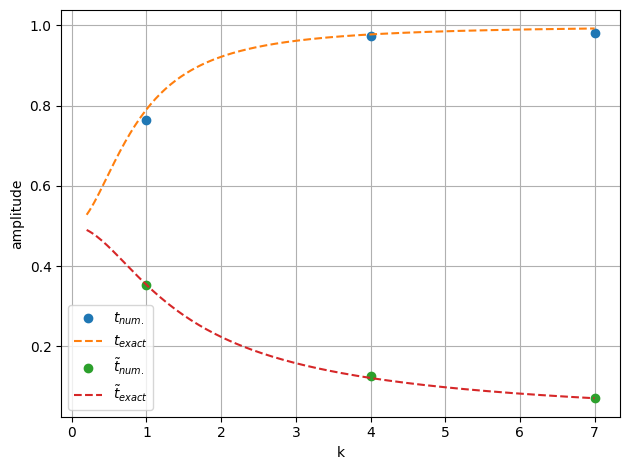

In [50]:
# Theoretical model
class Transition:
    def __init__(self, Qu, Qv):
        self.Qu = Qu
        self.Qv = Qv
    def gamma_u(self, k):
        return (0+2j) * k * self.Qu
    def gamma_v(self, k):
        return (0+2j) * k * self.Qv
    def t(self, k):
        if k == 0:
            return 0.+0j
        gu = self.gamma_u(k)
        gv = self.gamma_v(k)
        return gu / (gu - 1 +  1 / (1-gv))
    #def r(self, k):
    #    return 1 - self.t(k)
    def r_tilde(self, k):
        gu = self.gamma_u(k)
        gv = self.gamma_v(k)
        #return gu / ((gu-1)*(gv-1)-1) * (gv - 1)
        return self.t(k) / (gv - 1)
    def t_tilde(self, k):
        return self.r_tilde(k)

tr  = Transition(1, 1)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(ks, [a[0] for a in amplitudes], "o", label=r'$t_{num.}$')
ax.plot(ks_larger, [np.abs(tr.t(k)) for k in ks_larger], "--", label=r'$t_{exact}$')
ax.plot(ks, [a[1] for a in amplitudes], "o", label=r'$\tilde{t}_{num.}$')
ax.plot(ks_larger, [np.abs(tr.t_tilde(k)) for k in ks_larger], "--", label=r'$\tilde{t}_{exact}$')
#ax.plot(ks, [a[2] for a in amplitudes], "o", label='r_tilde')
#ax.plot(ks, [np.abs(tr.r_tilde(k)) for k in ks], "--", label='r_tilde_theory')
ax.legend()
ax.set_xlabel('k')
ax.set_ylabel('amplitude')
fig.tight_layout()
fig.show()
ax.grid()

#fig.savefig("amplitudes_2nd_order2.pdf")


In [193]:
np.real(tr.t(1.))**2 + np.real(tr.t_tilde(1))**2 + np.real(tr.r_tilde(1))**2 + np.real(tr.r_tilde(1))**2

0.75

In [51]:
ks = np.linspace(0.2, 7, 6)
ks_larger = np.linspace(0.2, 7, 200)
from tqdm import tqdm
amplitudes = {}
for order in [2, 3, 5, 7]:
    print(order)
    amplitudes[order] = [get_amplitudes(k, order=order, n_space_pts=500, n_time_steps=15000) for k in tqdm(ks)]

import pickle
pickle.dump(amplitudes, open('amplitudes_vs_orders.pkl', 'wb'))
print("Saved")


2


100%|██████████| 6/6 [00:50<00:00,  8.41s/it]


3


100%|██████████| 6/6 [00:50<00:00,  8.39s/it]


5


100%|██████████| 6/6 [00:49<00:00,  8.23s/it]


7


100%|██████████| 6/6 [00:52<00:00,  8.77s/it]

Saved


In [28]:
'''ks = np.linspace(0.2, 7, 20)
ks_larger = np.linspace(0.2, 7, 200)
amplitudes = {}
for order in [2, 3, 5, 7]:
    amplitudes[order] = [get_amplitudes(k, order=order) for k in ks]

import pickle
pickle.dump(amplitudes, open('amplitudes_vs_orders.pkl', 'wb'))
print("Saved")
'''

'ks = np.linspace(0.2, 7, 20)\nks_larger = np.linspace(0.2, 7, 200)\namplitudes = {}\nfor order in [2, 3, 5, 7]:\n    amplitudes[order] = [get_amplitudes(k, order=order) for k in ks]\n\nimport pickle\npickle.dump(amplitudes, open(\'amplitudes_vs_orders.pkl\', \'wb\'))\nprint("Saved")\n'

In [52]:
import matplotlib.pyplot as plt

/tmp/ipykernel_2403/2135966018.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


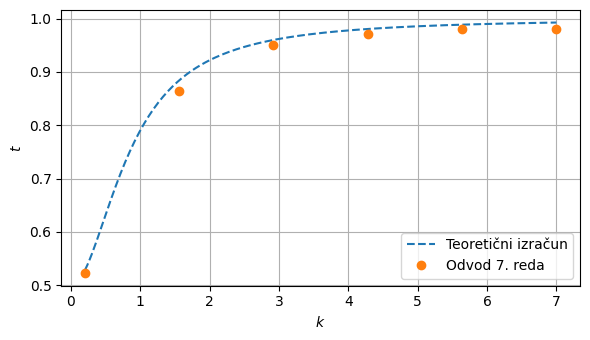

In [53]:
amplitudes = pickle.load(open('amplitudes_vs_orders.pkl', 'rb'))
fig, ax = plt.subplots(figsize=(6, 3.5))
xs = list(amplitudes.keys())
ax.plot(ks_larger, [np.abs(tr.t(k)) for k in ks_larger], "--", label='Teoretični izračun')
for key in xs:
    if key == 2:
        continue
    if key not in [7]:
        continue
    ax.plot(ks, [a[0] for a in amplitudes[key]], "o", label="Odvod " + str(key) + ". reda")
#ax.plot(xs, [amplitudes[key][0] for key in xs], "o", label='t')
ax.legend()
ax.grid()
ax.set_xlabel('$k$')
ax.set_ylabel('$t$')
fig.tight_layout()
fig.show()
fig.savefig("orders_2_and_7_k_vs_T.pdf")

/tmp/ipykernel_2403/2023637007.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


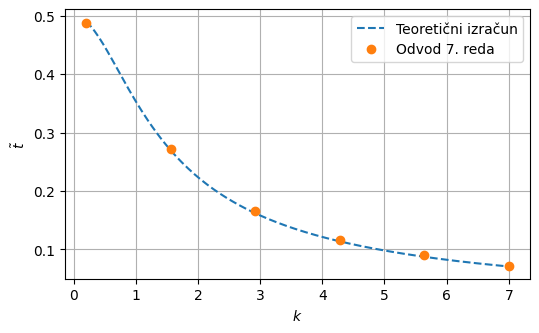

In [54]:
amplitudes = pickle.load(open('amplitudes_vs_orders.pkl', 'rb'))
fig, ax = plt.subplots(figsize=(6, 3.5))
xs = list(amplitudes.keys())
ax.plot(ks_larger, [np.abs(tr.t_tilde(k)) for k in ks_larger], "--", label=r'Teoretični izračun')
for key in xs:
    if key == 2:
        continue
    if key not in [7]: continue
    ax.plot(ks, [a[2] for a in amplitudes[key]], "o", label="Odvod " + str(key) + ". reda")
#ax.plot(xs, [amplitudes[key][0] for key in xs], "o", label='t')
ax.legend()
ax.grid()
ax.set_xlabel('$k$')
ax.set_ylabel(r'$\tilde{t}$')
fig.show()
fig.savefig("orders_k_vs_T_tilde.pdf")


/tmp/ipykernel_2403/1139585234.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


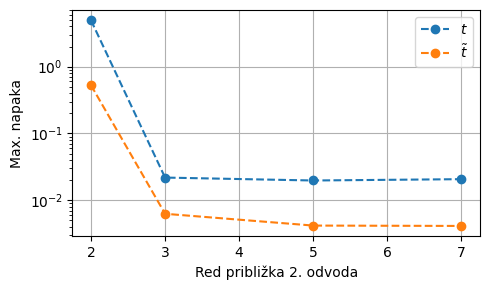

In [81]:
amplitudes = pickle.load(open('amplitudes_vs_orders.pkl', 'rb'))
fig, ax = plt.subplots(figsize=(5, 3))
xs = list(amplitudes.keys())
true_ks = np.array([np.abs(tr.t(k)) for k in ks])
true_ks1= np.array([np.abs(tr.t_tilde(k)) for k in ks])
orders, errors = [], []
orders1, errors1 = [], []
for key in xs:
    orders.append(key)
    measured_ks = np.array([a[0] for a in amplitudes[key]])
    measured_ks_1 = np.array([a[2] for a in amplitudes[key]])
    errors.append(np.max(np.abs(true_ks - measured_ks)))
    errors1.append(np.max(np.abs(true_ks1 - measured_ks_1)))




ax.plot(orders, errors, "o--", label=r"$t$")
ax.plot(orders, errors1, "o--", label=r"$\tilde{t}$")

ax.set_yscale("log")
#ax.plot(xs, [amplitudes[key][0] for key in xs], "o", label='t')
ax.legend()
ax.set_xlabel("Red približka 2. odvoda")
ax.set_ylabel("Max. napaka")
ax.grid()
fig.tight_layout()
fig.show()
fig.savefig("max_err_vs_order_T.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_2403/3867732434.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


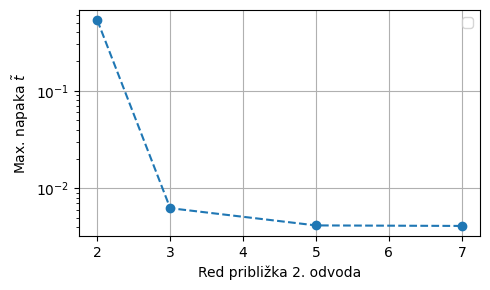

In [77]:
amplitudes = pickle.load(open('amplitudes_vs_orders.pkl', 'rb'))
fig, ax = plt.subplots(figsize=(5,3))
xs = list(amplitudes.keys())
true_ks = np.array([np.abs(tr.t_tilde(k)) for k in ks])
orders, errors = [], []

for key in xs:
    orders.append(key)
    measured_ks = np.array([a[2] for a in amplitudes[key]])
    errors.append(np.max(np.abs(true_ks - measured_ks)))

ax.plot(orders, errors, "o--")
#ax.plot(xs, [amplitudes[key][0] for key in xs], "o", label='t')
ax.legend()
ax.set_xlabel("Red približka 2. odvoda")
ax.set_yscale("log")
ax.set_ylabel(r"Max. napaka $\tilde{t}$")
ax.grid()
fig.tight_layout()
fig.show()
fig.savefig("max_err_vs_order_T_tilde.pdf")

In [57]:
get_derivative_matrix(5, order=2).todense()

matrix([[-2.,  1.,  0.,  0.,  0.],
        [ 1., -2.,  1.,  0.,  0.],
        [ 0.,  1., -2.,  1.,  0.],
        [ 0.,  0.,  1., -2.,  1.],
        [ 0.,  0.,  0.,  1., -2.]])